In [368]:
import urllib2
import os
from bs4 import BeautifulSoup
import re
from datetime import datetime
import csv
import matplotlib.pyplot as plt

In [2]:
os.chdir('./Downloads')

In [354]:
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

cve_to_date = load_obj("cve_to_bugzilla_date")
blah = {}
for key,val in cve_to_date.iteritems():
    key = key.encode('utf8')
    blah[key] = val
cve_to_date = blah
print len(cve_to_date)

1207


In [374]:
#year wise trend of foundational vulnerabilities
fTotal = {}
total = {}
foundation = 1
def foundationalTotal(filename,year):
    with open(filename) as csvDataFile:
            csvReader = csv.reader(csvDataFile)
            next(csvReader, None)
            #d[year] = 0
            for row in csvReader:
                cveNum = row[0].strip()
                if cveNum in cve_to_date:
                    minYear = min(year,cve_to_date[cveNum].year)
                else: 
                    minYear = year
                row[1] = row[1].strip()
                if row[1] == '' or row[1] == '-':
                    continue
                verSplit = row[1].split('.')
                if minYear in total:
                    total[minYear] += 1
                else:
                    total[minYear] = 1
                try:
                    if(int(verSplit[0]) <= foundation):
                        if minYear in fTotal:
                            fTotal[minYear] += 1
                        else:
                            fTotal[minYear] = 1
                except ValueError:
                    continue
                   
foundationalTotal("firefox2016.csv",2016)  
foundationalTotal("firefox2015.csv",2015)
foundationalTotal("firefox2014.csv",2014)
foundationalTotal("firefox2013.csv",2013)
foundationalTotal("firefox2012.csv",2012)
foundationalTotal("firefox2011.csv",2011)
foundationalTotal("firefox2010.csv",2010)
foundationalTotal("firefox2009.csv",2009)
foundationalTotal("firefox2008.csv",2008)
foundationalTotal("firefox2007.csv",2007)
foundationalTotal("firefox2006.csv",2006)
fTotal.pop(2000)
fTotal.pop(2005)
fTotal[2016] = 0
total.pop(2000)
total.pop(2002)
total.pop(2003)
total.pop(2004)
total.pop(2005)
print fTotal
print total

{2016: 0, 2006: 50, 2007: 34, 2008: 41, 2009: 48, 2010: 50, 2011: 40, 2012: 128, 2013: 41, 2014: 36, 2015: 4}
{2016: 77, 2006: 58, 2007: 85, 2008: 102, 2009: 111, 2010: 93, 2011: 104, 2012: 188, 2013: 127, 2014: 123, 2015: 176}


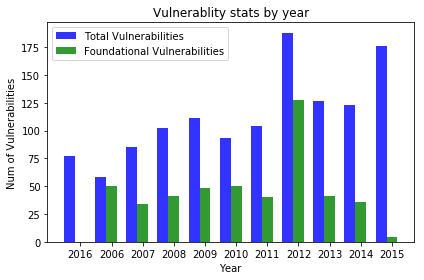

In [376]:
#plotting year vs foundational vuls
# data to plot
n_groups = len(total)
means_total = total.values()
means_fTotal = fTotal.values() 
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_total, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Total Vulnerabilities')
 
rects2 = plt.bar(index + bar_width, means_fTotal, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Foundational Vulnerabilities')
 
plt.xlabel('Year')
plt.ylabel('Num of Vulnerabilities')
plt.title('Vulnerablity stats by year')
plt.xticks(index + bar_width, total.keys())
plt.legend()
 
plt.tight_layout()
plt.show()

[0, 86, 40, 40, 43, 53, 38, 68, 32, 29, 2]


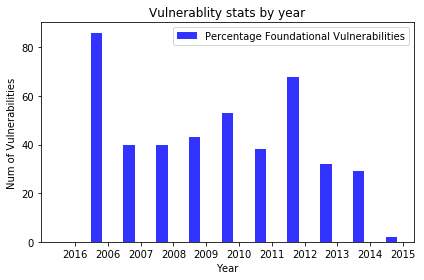

In [379]:
#plotting % foundational vuls by year
# data to plot
n_groups = len(total)
percent = []
for val1,val2 in zip(fTotal.values(),total.values()):
    res = (val1*100)/val2
    percent.append(res)
print percent
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, percent, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Percentage Foundational Vulnerabilities')

plt.xlabel('Year')
plt.ylabel('Num of Vulnerabilities')
plt.title('Vulnerablity stats by year')
plt.xticks(index + bar_width, total.keys())
plt.legend()
 
plt.tight_layout()
plt.show()

In [ ]:
#if period is divided in half, the trend
first = 0
second = 0
for key,val in d.iteritems():
    if key < 2011:
        first = first + val
    else:
        second = second + val
print first, second

In [356]:
#trying to get unique initial versions to get their release dates
v = []
def versions(filename,year):
    with open(filename) as csvDataFile:
            csvReader = csv.reader(csvDataFile)
            next(csvReader, None)
            #d[year] = 
            for row in csvReader:
                row[1] = row[1].strip()
                if row[1] == '' or row[1] == '-':
                    continue
                v.append(row[1])
versions("firefox2006.csv",2006)
versions("firefox2007.csv",2007)
versions("firefox2008.csv",2008)
versions("firefox2009.csv",2009)
versions("firefox2010.csv",2010)
versions("firefox2011.csv",2011)
versions("firefox2012.csv",2012)
versions("firefox2013.csv",2013)
versions("firefox2014.csv",2014)
versions("firefox2015.csv",2015)
versions("firefox2016.csv",2016)
temp = set(v)
temp.remove("[[datetime.datetime(2011, 1, 6, 17, 44), datetime.datetime(2011, 1, 6, 17, 46), u'Canvas: WebGL', []]]")
v = list(temp)
print v

['7.0', '12.0', '6.0', '37.0', '28.0.1', '10.0', '43.0', '3.0.10', '16.0', '3.0.19', '43.0.1', '43.0.4', '3.5.2', '3.5.1', '38.1.0', '40.0.2', '40.0.3', '45.0.2', '45.0.1', '3.0.6', '3.0.7', '3.0.4', '1.5.0.12', '3.0.2', '3.0.3', '3.0.1', '3.0.9', '3.6', '3.5', '3.6.27', '3.0', '3.1', '2.0', '34.0.5', '2.0.0.12', '2.0.0.11', '2.0.0.14', '2.0.0.9', '2.0.0.8', '2.0.0.7', '2.0.0.6', '2.0.0.5', '2.0.0.4', '2.0.0.3', '2.0.0.1', '48.0.2', '27.0', '29.0.1', '37.0.1', '37.0.2', '1.5.0.10', '3.6.1', '3.6.2', '3.6.3', '3.6.7', '32.0', '33.0', '0.8', '42.0', '3.0.5', '19.0', '39.0', '8.0', '2', '30.0', '3.5.10', '41.0', '1.5.0.4', '1.5.0.7', '1.5.0.6', '1.5.0.1', '28.0', '41.0.2', '41.0.1', '1.5.0.9', '1.5.0.8', '47.0.1', '1.5', '1.0', '2.0 8', '0.1', '0.2', '1.8', '38.0', '39.0.3', '36.0.1', '36.0.3', '44.0.2', '36.0.4', '44.0.1', '4.0', '3.0beta5', '46.0.1']


In [357]:
dates = ['2011-09-27','2012-04-24','2011-08-16','2015-03-31','2014-03-24','2012-01-31','2015-12-15','2009-04-27','2012-10-09','2010-03-30','2015-12-18', 
        '2016-01-06','2009-08-03','2009-07-16','2015-07-02','2015-08-13','2015-08-27','2016-04-11','2016-03-16','2009-02-03',
        '2009-03-04','2008-11-12','2007-05-30','2008-09-23','2008-09-26','2008-07-16','2009-04-21','2010-01-21','2009-06-30',
        '2012-02-17','2008-06-17','2008-07-28','2006-10-24','2014-12-1','2008-02-07','2007-11-30','2008-04-16','2007-11-01',
        '2007-10-18','2007-09-18', '2007-07-30', '2007-07-17', '2007-04-30', '2007-03-20', '2006-12-19', '2016-08-24', 
         '2014-02-04', '2014-05-09', '2015-04-03','2015-04-20', '2007-02-23', '2010-01-21', '2010-03-22', '2010-04-01',
         '2010-07-20', '2014-09-02', '2014-10-14', '2004-02-09', '2015-11-03', '2008-12-16', '2013-02-19', '2015-07-02',
         '2011-11-08', '2006-10-24', '2014-06-10', '2010-06-22', '2015-09-22', '2006-06-01', '2006-09-14', '2006-08-02',
         '2006-02-01', '2014-03-18', '2015-10-15', '2015-09-30', '2006-12-19', '2006-11-07', '2016-06-28', '2005-11-29', 
         '2004-11-09', '2006-10-24', '2002-09-23', '2002-10-01', '2007-04-30', '2015-04-12', '2015-08-06', '2015-03-05', 
         '2015-03-20', '2016-02-11', '2015-03-21', '2016-02-08', '2011-03-22', '2008-04-02', '2016-04-03']

In [358]:
versionDict = {}
for key,value in zip(v,dates):
    value = datetime.strptime(value, '%Y-%m-%d')
    versionDict[key] = value 

In [359]:
import pickle

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

save_obj(versionDict, "versiondict")

In [360]:
len(temp)

93

In [361]:
#maps CVEs to their initial versions
cveDict = {}
def cveCreator(filename,year):
    with open(filename) as csvDataFile:
            csvReader = csv.reader(csvDataFile)
            next(csvReader, None)
            #d[year] = (0,0)
            for row in csvReader:
                row[1] = row[1].strip()
                row[0] = row[0].strip()
                #print row[0]
                cveDict[row[0]] = row[1]
cveCreator("firefox2006.csv",2006)
cveCreator("firefox2007.csv",2007)
cveCreator("firefox2008.csv",2008)
cveCreator("firefox2009.csv",2009)
cveCreator("firefox2010.csv",2010)
cveCreator("firefox2011.csv",2011)
cveCreator("firefox2012.csv",2012)
cveCreator("firefox2013.csv",2013)
cveCreator("firefox2014.csv",2014)
cveCreator("firefox2015.csv",2015)
cveCreator("firefox2016.csv",2016)                

In [400]:
#mean time to report vulnerabilites
dateDiffDict = {}
for key,value in cve_to_date.iteritems():
    #key = key.encode('utf8')
    if key in cveDict:
        earlyVersion = cveDict[key]
        if earlyVersion in versionDict:
            releaseDateOfVersion = versionDict[earlyVersion]
            difference = ((value - releaseDateOfVersion).total_seconds())/(24*3600)
            if difference < 0:
                difference = 0
            
            earlyVersion = earlyVersion.split('.')[0]
            if earlyVersion in dateDiffDict:
                dateDiffDict[earlyVersion].append(int(difference))
            else:
                dateDiffDict[earlyVersion] = [int(difference)]
                
for key,value in dateDiffDict.iteritems():
    dateDiffDict[key] = sorted(value)

dateDiffMean = {}
for key,value in dateDiffDict.iteritems():
    dateDiffMean[int(key)] = int(np.mean(value))
dateDiffMean
dateDiffMean[1] = int((dateDiffMean[0] + dateDiffMean[1])/2)
dateDiffMean.pop(0)
print dateDiffMean

{1: 2650, 2: 283, 3: 199, 4: 252, 6: 0, 7: 0, 8: 28, 10: 4, 12: 4, 16: 1, 19: 75, 27: 0, 28: 0, 29: 0, 30: 26, 32: 6, 33: 3, 34: 4, 36: 0, 37: 0, 38: 1, 39: 0, 40: 0, 41: 1, 42: 2, 43: 1, 44: 1, 45: 0, 46: 7, 47: 1, 48: 1}


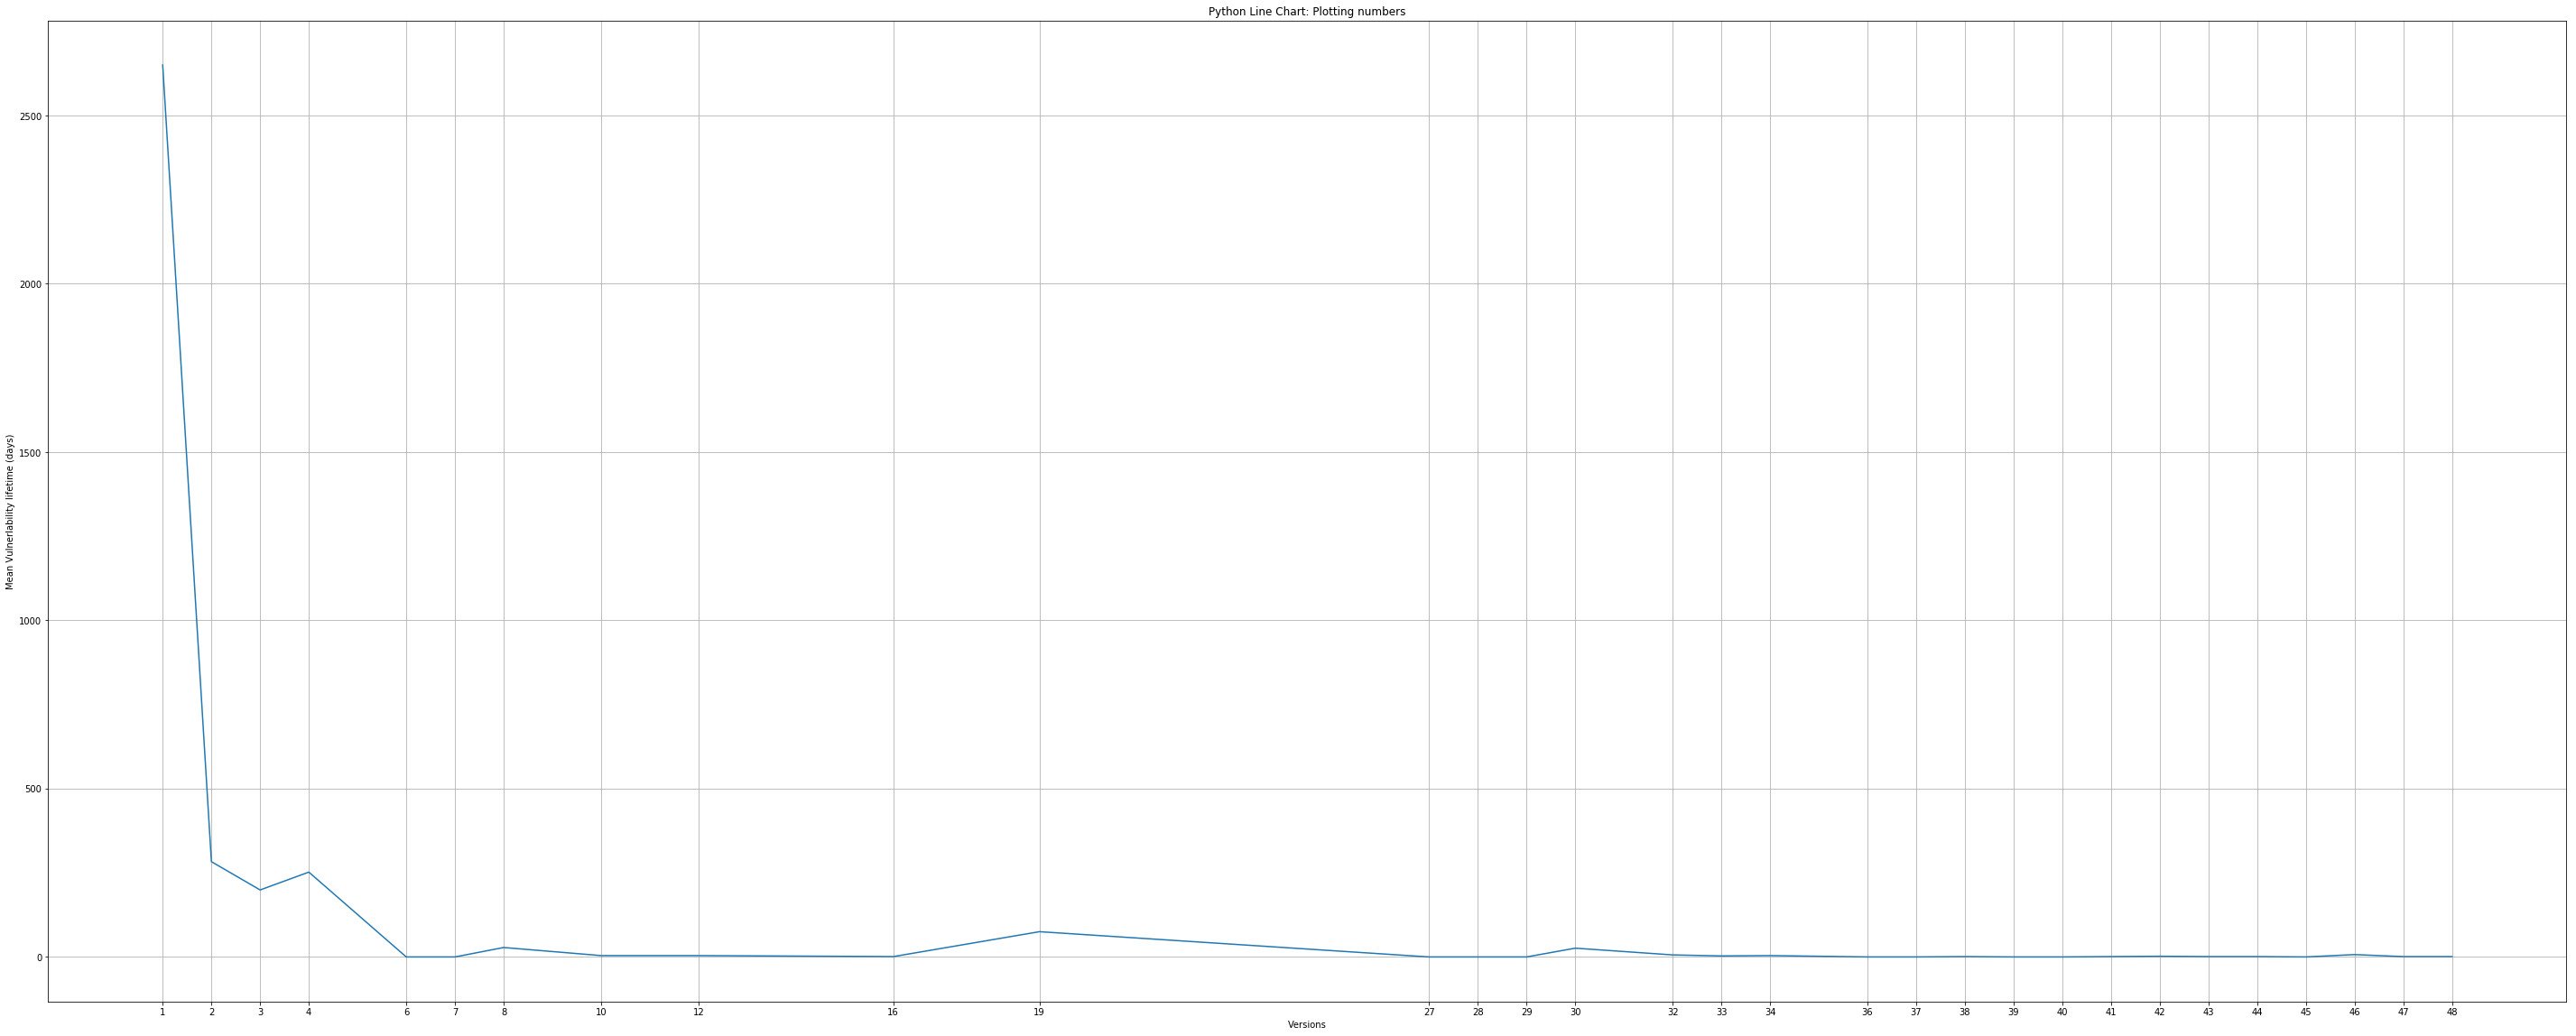

In [430]:
#Plot for mean lifetime of vulerabilities
#from pylab import *
t = dateDiffMean.keys()
s = dateDiffMean.values()
plt.figure(figsize=(50,20))
plt.plot(t, s)
 
plt.xlabel('Versions')
plt.ylabel('Mean Vulnerlability lifetime (days)')
plt.title('Python Line Chart: Plotting numbers')
plt.grid(True)
plt.xticks(t)
plt.show()

In [409]:
d2 = {}
p = 0
def versionWiseTotal(filename):
    with open(filename) as csvDataFile:
            csvReader = csv.reader(csvDataFile)
            next(csvReader, None)
            for row in csvReader:
                try:
                    row[1] = row[1].strip()
                    row[2] = row[2].strip()
                    if row[1] == '' or row[1] == '-' or row[2] == '' or row[2] == '-':
                        continue
                    startVerSplit = int(row[1].split('.')[0])
                    endVerSplit = int(row[2].split('.')[0])+1
                    #print row[1]
                    if startVerSplit < foundation:
                        startVerSplit = foundation
                    if endVerSplit < foundation:
                        endVerSplit = foundation
                    if (startVerSplit,endVerSplit) in d2:
                        d2[(startVerSplit,endVerSplit)] += 1
                    else:
                        d2[(startVerSplit,endVerSplit)] = 1
                    p+=1
                except Exception:
                    continue

files = ['firefox2016.csv','firefox2015.csv', 'firefox2014.csv', 'firefox2013.csv', 'firefox2012.csv', 
         'firefox2011.csv', 'firefox2010.csv', 'firefox2009.csv', 'firefox2008.csv', 'firefox2007.csv', 
         'firefox2006.csv']

for file in files:
    versionWiseTotal(file)
    
d2

{(1, 2): 34,
 (1, 3): 47,
 (1, 4): 152,
 (1, 5): 10,
 (1, 6): 1,
 (1, 7): 1,
 (1, 8): 5,
 (1, 9): 1,
 (1, 10): 7,
 (1, 13): 1,
 (1, 15): 32,
 (1, 16): 25,
 (1, 17): 35,
 (1, 18): 27,
 (1, 19): 14,
 (1, 20): 1,
 (1, 26): 13,
 (1, 27): 15,
 (1, 28): 19,
 (1, 29): 13,
 (1, 36): 18,
 (2, 3): 76,
 (2, 4): 20,
 (3, 4): 137,
 (3, 5): 5,
 (3, 6): 1,
 (3, 7): 7,
 (3, 11): 4,
 (4, 5): 7,
 (4, 6): 9,
 (4, 7): 3,
 (4, 8): 2,
 (4, 9): 4,
 (4, 10): 10,
 (4, 12): 12,
 (4, 13): 9,
 (4, 14): 19,
 (6, 7): 1,
 (7, 8): 2,
 (8, 9): 2,
 (10, 11): 1,
 (12, 13): 2,
 (16, 17): 1,
 (19, 20): 13,
 (19, 21): 14,
 (19, 22): 17,
 (19, 23): 15,
 (19, 24): 19,
 (19, 25): 14,
 (19, 26): 1,
 (27, 28): 1,
 (28, 29): 3,
 (29, 30): 10,
 (30, 31): 14,
 (30, 32): 8,
 (30, 33): 12,
 (32, 33): 1,
 (33, 34): 11,
 (34, 35): 10,
 (36, 37): 18,
 (37, 38): 18,
 (38, 39): 19,
 (39, 40): 20,
 (40, 41): 30,
 (41, 42): 24,
 (41, 43): 1,
 (42, 43): 21,
 (43, 44): 18,
 (44, 45): 42,
 (45, 46): 13,
 (46, 47): 14,
 (47, 48): 24,
 (48, 49)

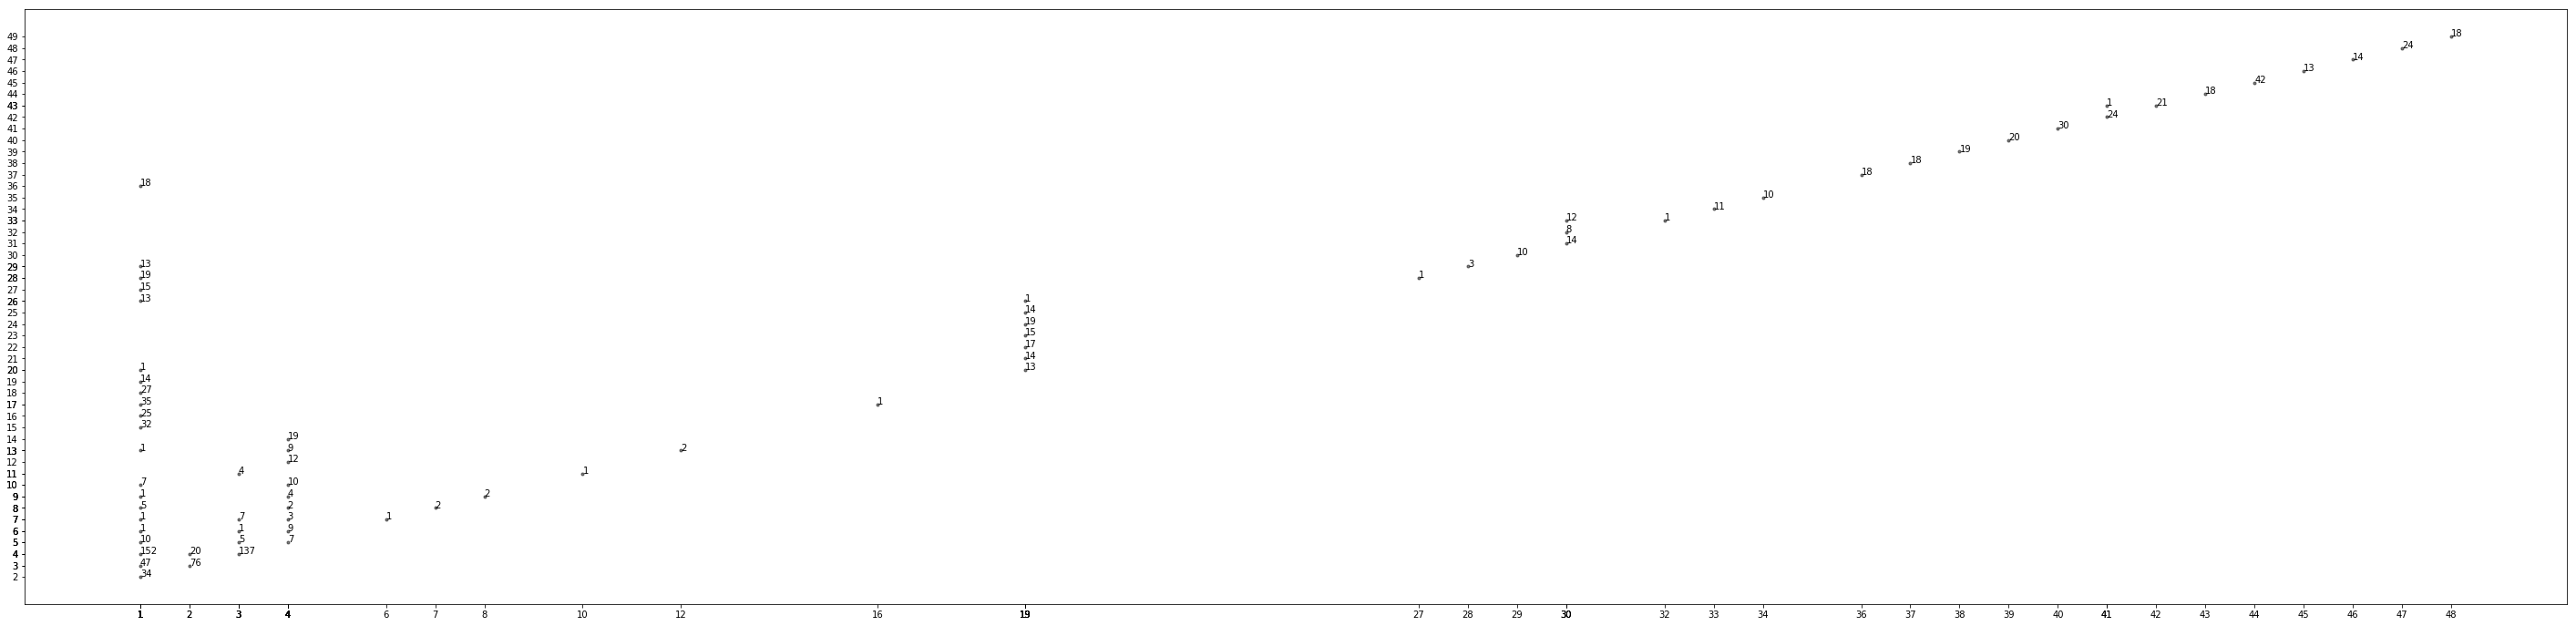

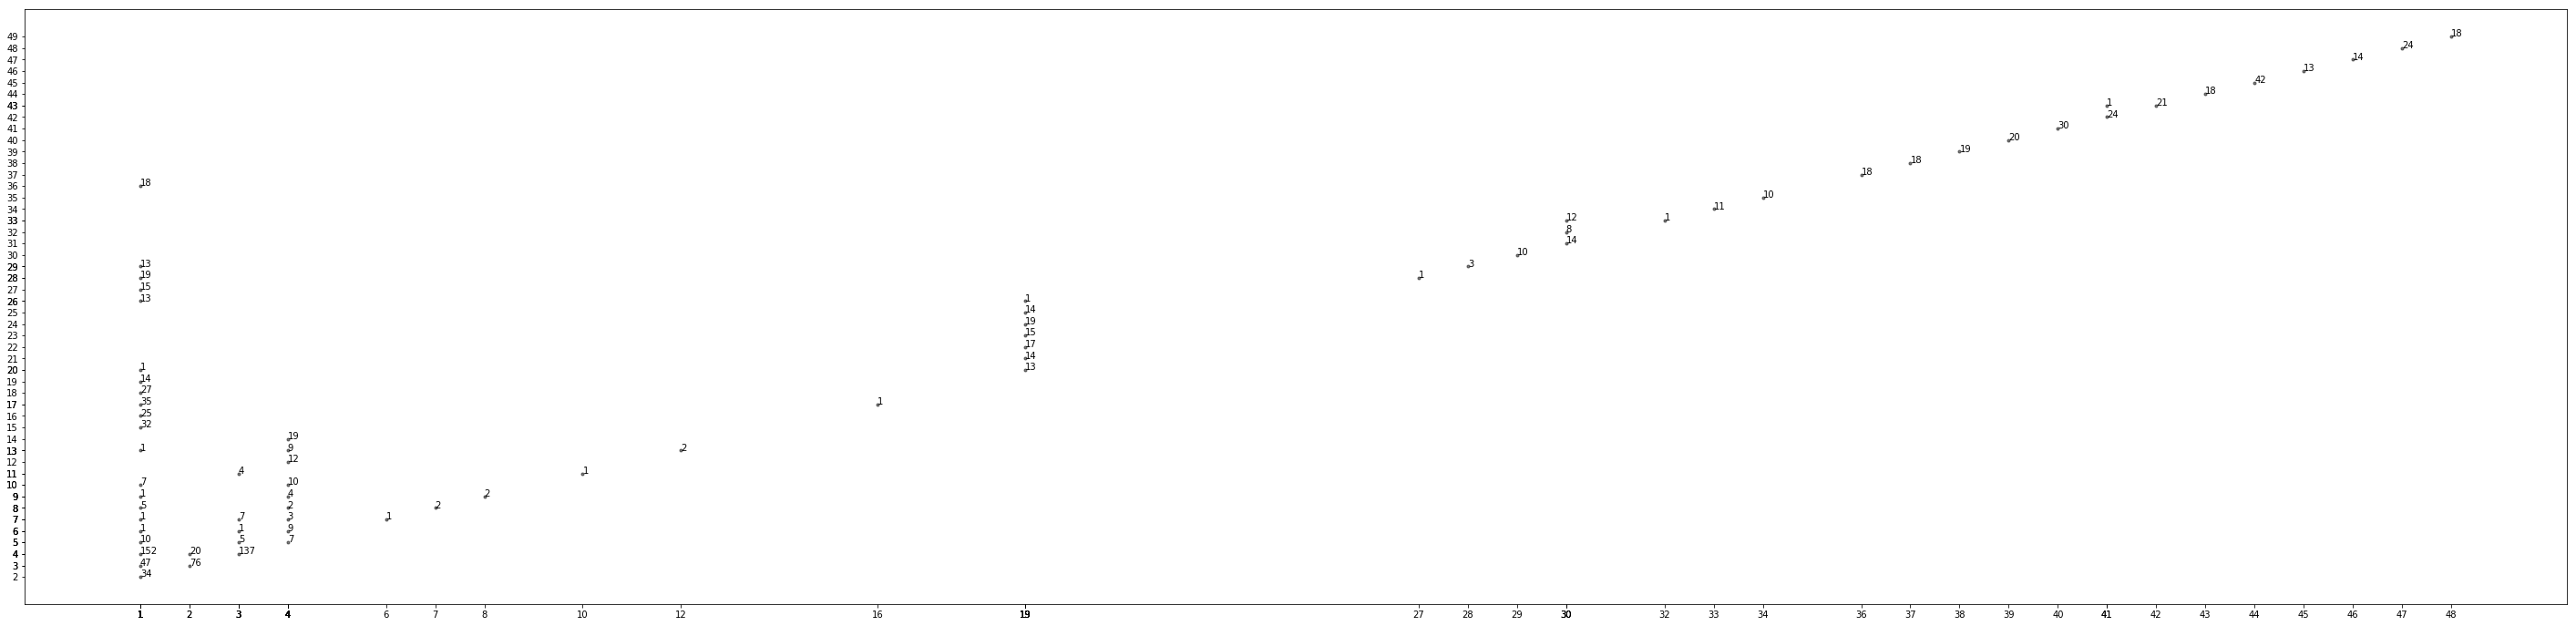

In [434]:
x = []
y = []
count = []
for key,val in d2.iteritems():
    x.append(key[0])
    y.append(key[1])
    count.append(val)

colors = (0,0,0)
area = np.pi*3
 
# Plot
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
#plt.title('Scatter plot pythonspot.com')
#plt.xticks(x)
#plt.yticks(y)
#plt.xlabel('x')
#plt.ylabel('y')

fig, ax = plt.subplots()
ax.scatter(x, y, s=area, c=colors, alpha=0.5)

for i, txt in enumerate(count):
    ax.annotate(txt, (x[i],y[i]))
#fig.figure(figsize=(50,70))
plt.xticks(x)
plt.yticks(y)

plt.show()

In [132]:
#failed attempt at finding duration of fixing
d3 = {}
def durationB(filename):
    #print "woof"
    with open(filename) as csvDataFile:
            csvReader = csv.reader(csvDataFile)
            next(csvReader, None)
            #d[year] = 0
            for row in csvReader:
                #try:
                bugs = row[3].replace('[','').split('],')
                #lists = [map(int, s.replace(']','').split(',')) for s in bugs]
                print bugs
                    #print type(bugs)
                    
                #except Exception, e:
                    #print Exception
                    #continue
files = ['firefox2016.csv','firefox2015.csv', 'firefox2014.csv', 'firefox2013.csv', 'firefox2012.csv',
         'firefox2011.csv', 'firefox2010.csv', 'firefox2009.csv', 'firefox2008.csv', 'firefox2007.csv', 
         'firefox2006.csv']

for file in files:
   durationB(file)